In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

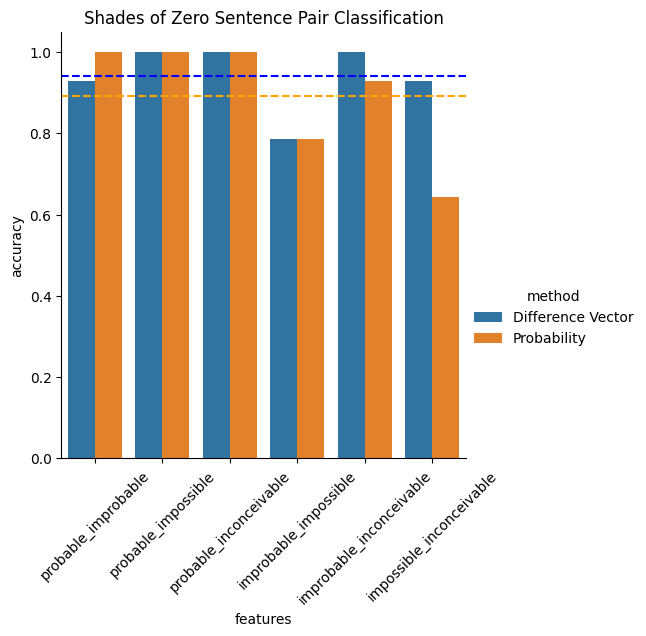

In [2]:
shades_clf = pd.read_csv("./results/gemma-2-2b/test_results.csv")
mean_diff_acc = np.mean(shades_clf[shades_clf["method"] == "Difference Vector"]["accuracy"])
mean_prob_acc = np.mean(shades_clf[shades_clf["method"] == "Probability"]["accuracy"])

g = sns.catplot(data=shades_clf, x="features", y="accuracy", hue="method", kind="bar")

plt.axhline(mean_diff_acc, linestyle="--", c="blue")
plt.axhline(mean_prob_acc, linestyle="--", c="orange")

plt.xticks(rotation=45)
plt.title("Shades of Zero Sentence Pair Classification")
plt.savefig("./results/gemma-2-2b/shades_clf.pdf", format="pdf", bbox_inches="tight")

/tmp/ipykernel_2247024/1122650798.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Prob-R Imposs-R", "Prob-R Imposs-U", "Prob-R Improb-R", "Prob-R Improb-U",\


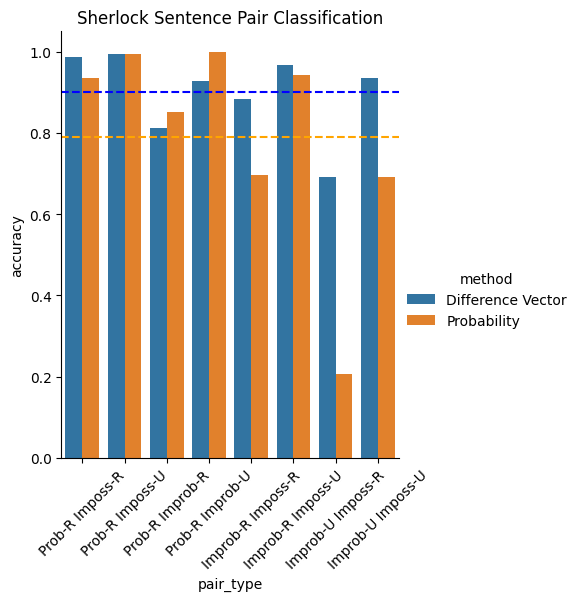

In [3]:
sherlock_clf = pd.read_csv("./results/gemma-2-2b/results_sherlock.csv")

g = sns.catplot(data=sherlock_clf, x="pair_type", y="accuracy", hue="method", kind="bar")
mean_diff_acc = np.mean(sherlock_clf[sherlock_clf["method"] == "Difference Vector"]["accuracy"])
mean_prob_acc = np.mean(sherlock_clf[sherlock_clf["method"] == "Probability"]["accuracy"])

plt.axhline(mean_diff_acc, linestyle="--", c="blue")
plt.axhline(mean_prob_acc, linestyle="--", c="orange")

for ax in g.axes.flat:
    ax.set_xticklabels(["Prob-R Imposs-R", "Prob-R Imposs-U", "Prob-R Improb-R", "Prob-R Improb-U",\
                        "Improb-R Imposs-R", "Improb-R Imposs-U", "Improb-U Imposs-R", "Improb-U Imposs-U"], rotation=45)

plt.title("Sherlock Sentence Pair Classification")
plt.savefig("./results/gemma-2-2b/sherlock.pdf", format="pdf", bbox_inches="tight")

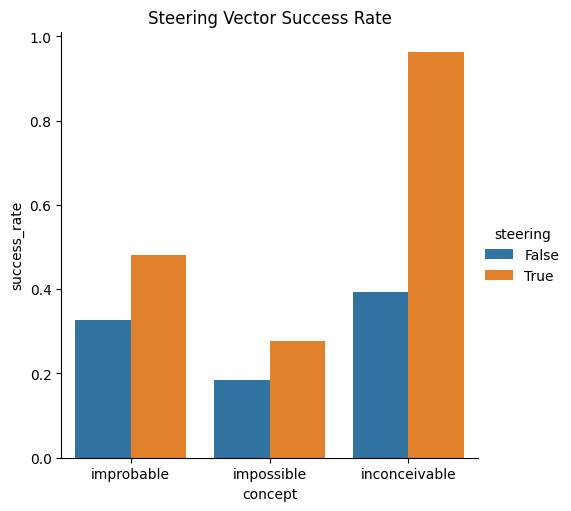

In [4]:
steering = pd.read_csv("./results/gemma-2-2b/steering_evaluation.csv")

g = sns.catplot(data=steering, x="concept", y="success_rate", hue="steering", kind="bar")

plt.title("Steering Vector Success Rate")
plt.savefig("./results/gemma-2-2b/steering.pdf", format="pdf", bbox_inches="tight")

In [4]:
vectors = pkl.load(open("./results/gemma-2-2b/diff_vectors_layer_16.pkl", "rb"))

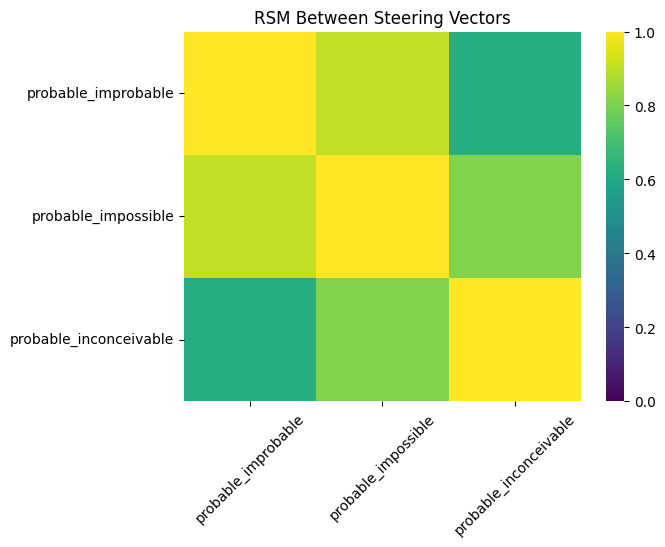

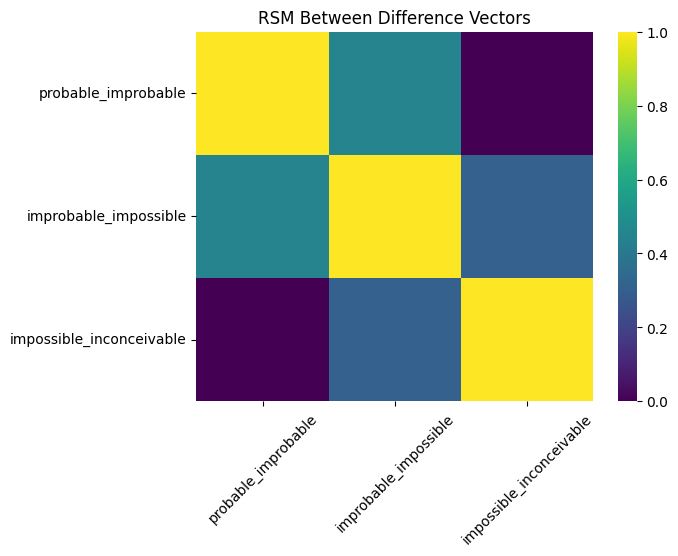

In [5]:
# Plot RSM of vectors
import torch.nn.functional as F
import torch

base_labels = ["probable_improbable", "probable_impossible", "probable_inconceivable"]
diff_labels = ["probable_improbable", "improbable_impossible", "impossible_inconceivable"]

base_vectors = F.normalize(torch.stack([vectors[lab] for lab in base_labels]), dim=1)
diff_vectors = F.normalize(torch.stack([vectors[lab] for lab in diff_labels]), dim=1)

base_sims = base_vectors @ base_vectors.T
diff_sims = diff_vectors @ diff_vectors.T

plt.figure()
sns.heatmap(base_sims.float(),
            xticklabels=base_labels,
            yticklabels=base_labels,
            cmap=sns.color_palette("viridis", as_cmap=True),
            vmin=0)

plt.xticks(rotation=45)
plt.title("RSM Between Steering Vectors")
plt.savefig("./results/gemma-2-2b/steering_rsm.pdf", format="pdf", bbox_inches="tight")

plt.figure()
sns.heatmap(diff_sims.float(),
            xticklabels=diff_labels,
            yticklabels=diff_labels,
            cmap=sns.color_palette("viridis", as_cmap=True),
            vmin=0)

plt.xticks(rotation=45)
plt.title("RSM Between Difference Vectors")
plt.savefig("./results/gemma-2-2b/diff_rsm.pdf", format="pdf", bbox_inches="tight")